In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Not One-Hot Encoded data trained model

In [2]:
# discovered the dataset on kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
costs = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

costs

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, instead of using the `.get_dummies()` in pandas to one-hot encode, I'll just go ahead and assign sequential integers

In [3]:
smoker_int = []
sex_int = []
region_int = []

smoker_index = list(set(costs["smoker"]))
sex_index = list(set(costs["sex"]))
region_index = list(set(costs["region"]))

print(smoker_index, sex_index, region_index)

for index, cost in costs.iterrows():
    smoker_int.append(smoker_index.index(cost["smoker"]))
    sex_int.append(sex_index.index(cost["sex"]))
    region_int.append(region_index.index(cost["region"]))

costs["smoker"] = smoker_int
costs["sex"] = sex_int
costs["region"] = region_int

costs

['no', 'yes'] ['female', 'male'] ['northwest', 'southwest', 'southeast', 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [4]:
X = costs.drop("charges", axis=1)
y = costs["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

history = model.fit(X_train, y_train, epochs=200, verbose=0)

model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 599us/step - loss: 2072.6694 - mae: 2072.6694


[2072.66943359375, 2072.66943359375]

<Axes: >

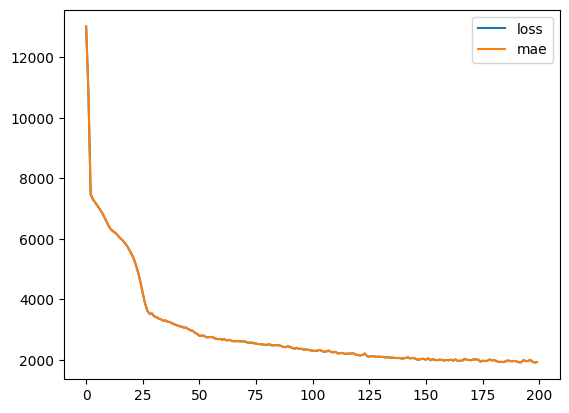

In [54]:
pd.DataFrame(history.history).plot()

### One-Hot Encoded data trained model

In [9]:
# discovered the dataset on kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance
one_hot_costs = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

one_hot_costs = pd.get_dummies(one_hot_costs, dtype=int)

one_hot_costs

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [11]:
X = one_hot_costs.drop("charges", axis=1)
y = one_hot_costs["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

history_1 = model_1.fit(X_train, y_train, epochs=200, verbose=0)

model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 604us/step - loss: 2011.0802 - mae: 2011.0802


[2011.0802001953125, 2011.0802001953125]

<Axes: >

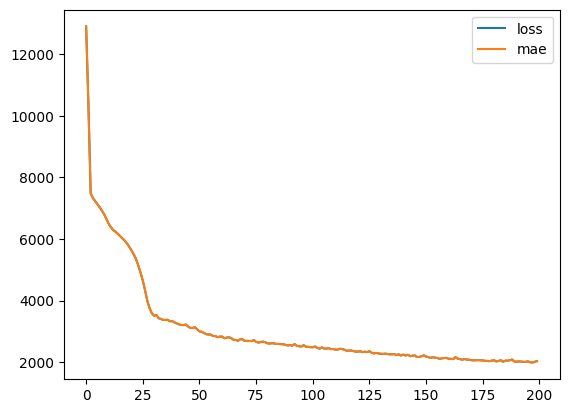

In [50]:
pd.DataFrame(history_1.history).plot()